In [29]:
import pandas as pd
import numpy as np
import glob 
from os.path import join
import ntpath
import os
from collections import defaultdict
import math
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from utils import matplotlib_setup
%matplotlib inline

In [34]:
def get_sampling_dirs(a_dir, only=''):
    dirs= [os.path.join(a_dir, name) for name in os.listdir(a_dir) 
                if os.path.isdir(os.path.join(a_dir, name)) and name.endswith('_l')  ]
    return sorted(dirs)

In [35]:
#GROUP='malicious'
FILTERED=False

GROUP = 'all'
#group = 'benign'
filtered_attacks = ['Benign','Infiltration','Brute Force-XSS', 'SQL Injection', 'SSH-BruteForce']

def get_num_of_records(d):
    df = pd.read_csv(join(d,'label_dist.csv'),names=['Label','Count'])
    if GROUP=='malicious':
        if FILTERED:
            return df[(~df['Label'].isin(filtered_attacks))]['Count'].sum()
        else:
            return df[(df['Label']!='Benign')]['Count'].sum()
        
    else:
        return df['Count'].sum()

In [10]:
def extract_sampler_names(dir_names):
    colors = []
    sampler_names = []
    for dir_name in dir_names:
        if 'SFS' in dir_name:
            color='orange'
            label = 'SketchFlow Sampling'
        elif 'SGS' in dir_name:
            color = 'green'
            label = 'Sketch Guided Sampling'
        elif 'SRS' in dir_name:
            color = 'blue'
            label = 'Simple Random Sampling'
        elif 'FFS' in dir_name:
            color = 'red'
            label = 'Fast Filtered Sampling'
        elif 'WS' in dir_name:
            color = 'gray'
            label = 'Without Sampling'
        else:
            print('Investigate plot_comparison',dir_name)
            
        colors.append(color)
        sampler_names.append(label)
    return sampler_names

In [75]:
patterns = [ "/" , "\\" , "|" , "-" , "+" , "x", "o", "O", ".", "*" ]
LINEWIDTH = 12
MSIZE = 40
MEDGESIZE = 12
YLABEL = '#extracted records (million)'
XLABEL = 'Flow Cache size (100% is ideal size for WS)'

In [46]:
if FILTERED:
    OUTFILE = 'effect_on_{}_records_filtered_wssh.png'.format(GROUP) 
else:
    OUTFILE = 'effect_on_{}_records.png'.format(GROUP)


Without Sampling               [92.15155, 131.538274, 209.366699, 371.809973]


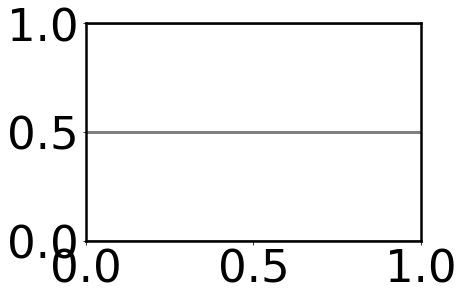

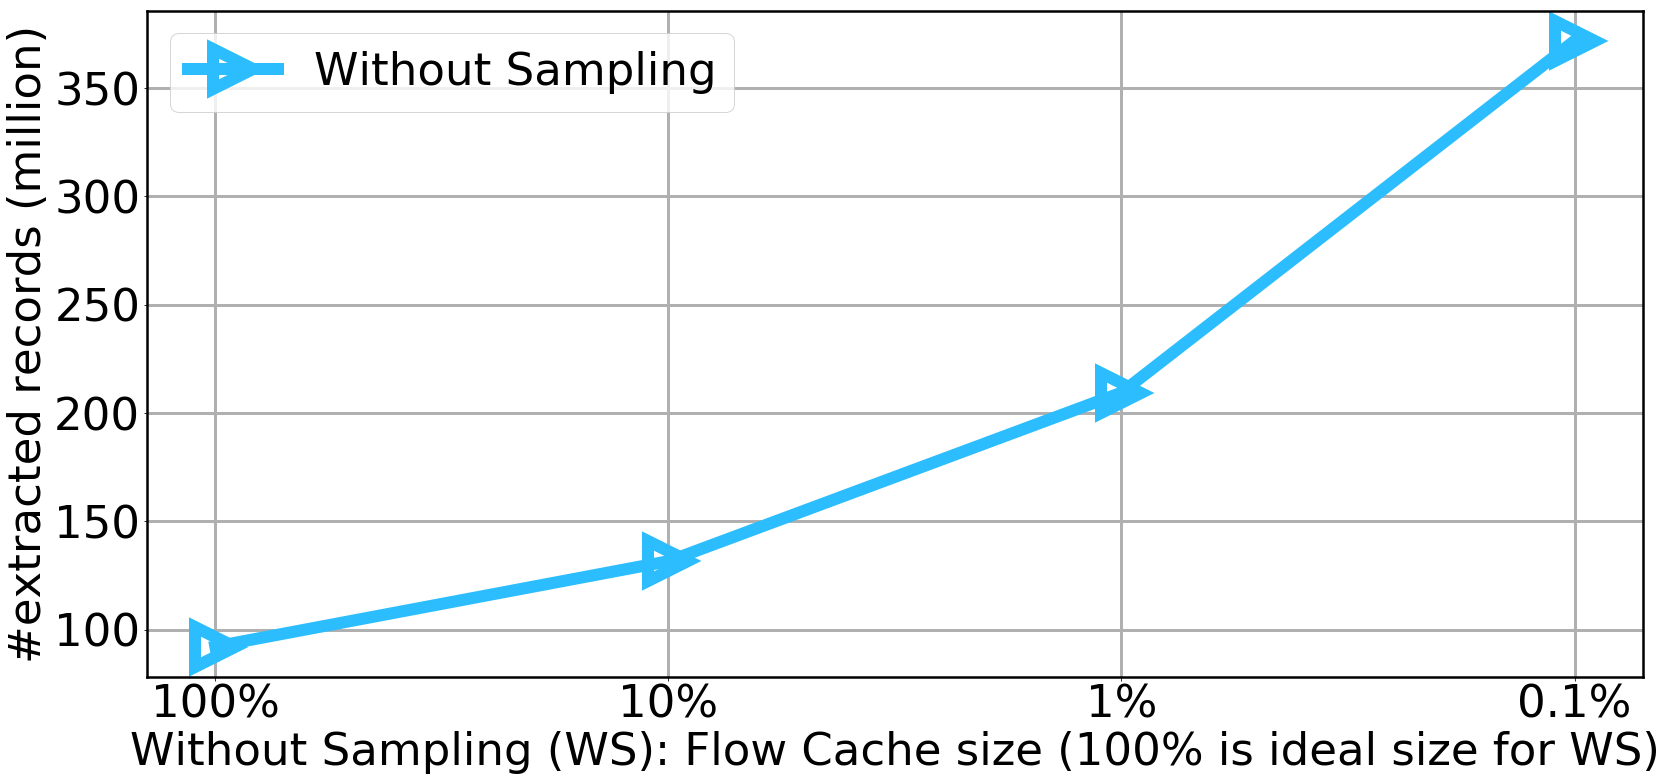

In [50]:
sampling_dirs = ['/data/juma/data/ids18/CSVs_r_1.0_m_1.0/WS_l/',
        '/data/juma/data/ids18/CSVs_r_0.1_m_1.0/WS_l/',
         '/data/juma/data/ids18/CSVs_r_0.01_m_1.0/WS_l/',
         '/data/juma/data/ids18/CSVs_r_0.001_m_1.0/WS_l/'
        ]
xtick_indices = np.arange(len(sampling_dirs))
xtick_labels = ['100%','10%','1%','0.1%']

records = defaultdict(list)
sampler_names = None
million=10**6


sampler_names = extract_sampler_names(sampling_dirs)   
num_records = [get_num_of_records(d) for d in sampling_dirs]    
for i,name in enumerate(sampler_names): 
    records[name].append(num_records[i]/million)

        

#drawing
N = len(roots)
ind = np.arange(N)
matplotlib_setup()
fig, ax = plt.subplots(nrows=1,ncols=1,sharex=False,figsize=(25,12))

    
markers = ['>','*','<','o','^']
for i,name in enumerate(sampler_names):
    print('{:30}'.format(sampler_names[i]),records[name])
    plt.plot(ind,records[name],label=sampler_names[i],linewidth=LINEWIDTH,marker=markers[i],\
            markersize=MSIZE, markeredgewidth=MEDGESIZE,markerfacecolor='none')

    break
plt.grid(linewidth=3)
plt.ylabel(YLABEL)
plt.xlabel('Without Sampling (WS): Flow Cache size (100% is ideal size for WS)')
plt.xticks(xtick_indices,xtick_labels)
#ax.set_ylim(25,60)
#ax.set_ylim(5,10)
fig.tight_layout()
#ax.legend(bbox_to_anchor=(1., 1.01))
plt.legend(ncol=2)
outfile = join(sampling_dirs[0],OUTFILE)
plt.savefig(outfile, bbox_inches='tight',dpi=100)
plt.show()

/data/juma/data/ids18/CSVs_r_1.0_m_1.0/SI_10/
['/data/juma/data/ids18/CSVs_r_1.0_m_1.0/SI_10/FFS_(8,16,4)_l', '/data/juma/data/ids18/CSVs_r_1.0_m_1.0/SI_10/SFS_SI_9.77_l', '/data/juma/data/ids18/CSVs_r_1.0_m_1.0/SI_10/SGS_e_0.05_l', '/data/juma/data/ids18/CSVs_r_1.0_m_1.0/SI_10/SRS_SI_10_l']
/data/juma/data/ids18/CSVs_r_0.1_m_1.0/SI_10/
['/data/juma/data/ids18/CSVs_r_0.1_m_1.0/SI_10/FFS_(8,16,4)_l', '/data/juma/data/ids18/CSVs_r_0.1_m_1.0/SI_10/SFS_SI_9.77_l', '/data/juma/data/ids18/CSVs_r_0.1_m_1.0/SI_10/SGS_e_0.05_l', '/data/juma/data/ids18/CSVs_r_0.1_m_1.0/SI_10/SRS_SI_10_l']
/data/juma/data/ids18/CSVs_r_0.01_m_1.0/SI_10/
['/data/juma/data/ids18/CSVs_r_0.01_m_1.0/SI_10/FFS_(8,16,4)_l', '/data/juma/data/ids18/CSVs_r_0.01_m_1.0/SI_10/SFS_SI_9.77_l', '/data/juma/data/ids18/CSVs_r_0.01_m_1.0/SI_10/SGS_e_0.05_l', '/data/juma/data/ids18/CSVs_r_0.01_m_1.0/SI_10/SRS_SI_10_l']
/data/juma/data/ids18/CSVs_r_0.001_m_1.0/SI_10/
['/data/juma/data/ids18/CSVs_r_0.001_m_1.0/SI_10/FFS_(8,16,4)_l', '/

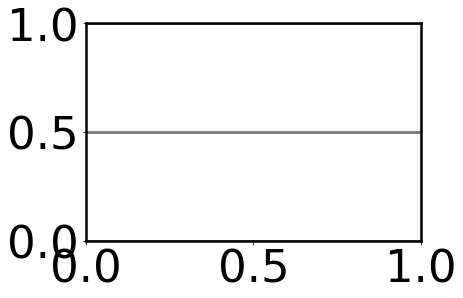

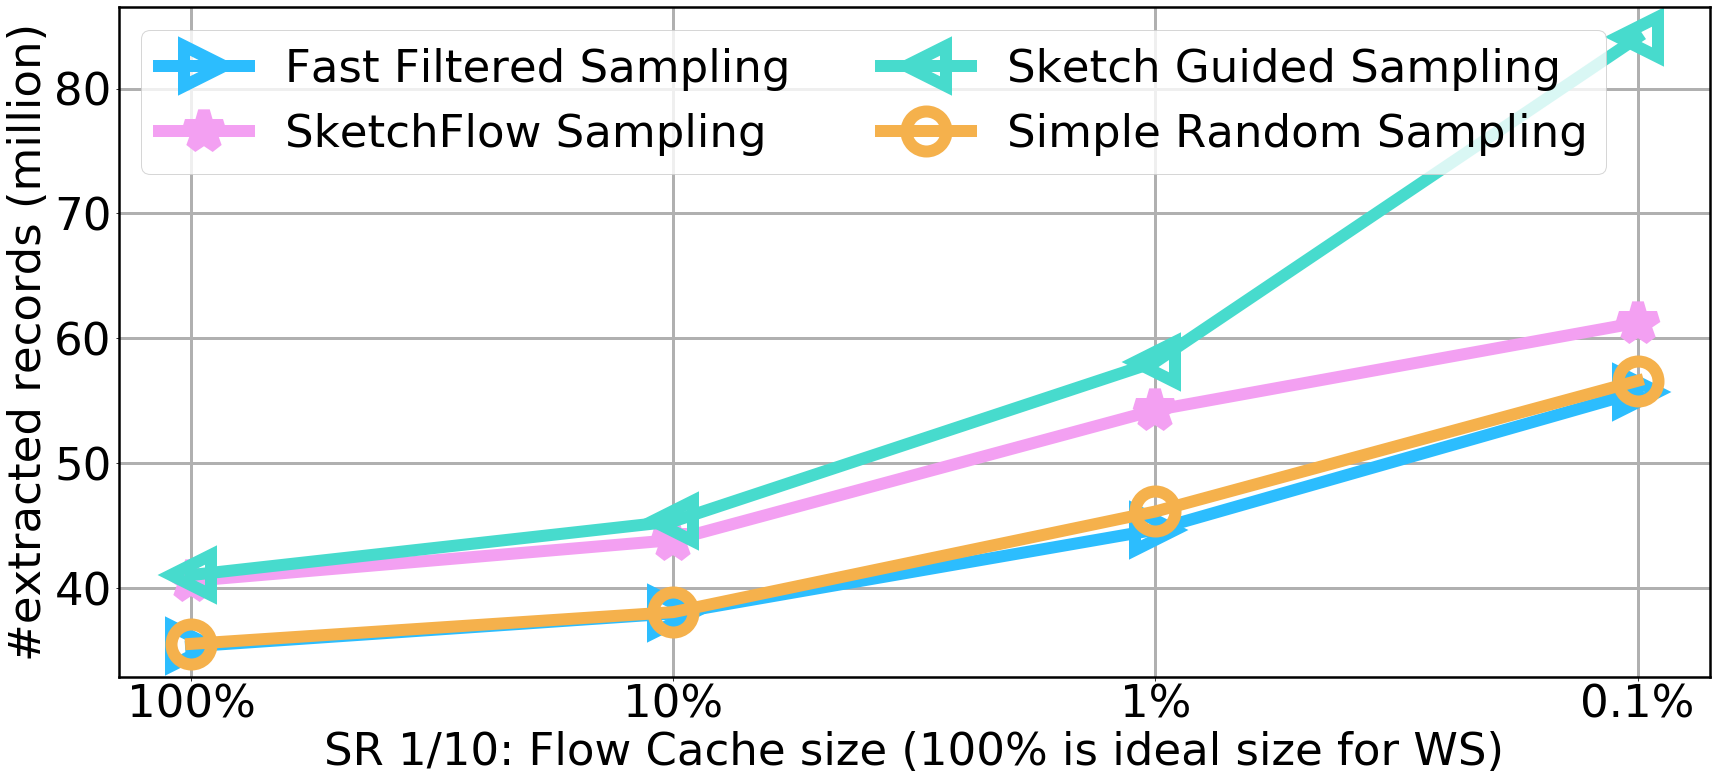

In [30]:
sr_dir = 'SI_10'
roots = ['/data/juma/data/ids18/CSVs_r_1.0_m_1.0/{}/'.format(sr_dir),
         '/data/juma/data/ids18/CSVs_r_0.1_m_1.0/{}/'.format(sr_dir),
        '/data/juma/data/ids18/CSVs_r_0.01_m_1.0/{}/'.format(sr_dir),
        '/data/juma/data/ids18/CSVs_r_0.001_m_1.0/{}/'.format(sr_dir)
        ]




records = defaultdict(list)
sampler_names = None
million=10**6

for root in roots:
    print(root)
    sampling_dirs = get_sampling_dirs(root)
    print(sampling_dirs)
    sampler_names = extract_sampler_names(sampling_dirs)   
    num_records = [get_num_of_records(d) for d in sampling_dirs]    
    for i,name in enumerate(sampler_names): 
        records[name].append(num_records[i]/million)

        

#drawing
N = len(roots)
ind = np.arange(N)
matplotlib_setup()
fig, ax = plt.subplots(nrows=1,ncols=1,sharex=False,figsize=(25,12))
markers = ['>','*','<','o','^']
for i,name in enumerate(sampler_names):
    print('{:30}'.format(sampler_names[i]),records[name])
    plt.plot(ind,records[name],label=sampler_names[i],linewidth=LINEWIDTH,marker=markers[i],\
            markersize=MSIZE, markeredgewidth=MEDGESIZE,markerfacecolor='none')

plt.grid(linewidth=3)
plt.ylabel(YLABEL)
plt.xlabel('SR 1/10: Flow Cache size (100% is ideal size for WS)')
plt.xticks(xtick_indices,xtick_labels)
#ax.set_ylim(25,60)
#ax.set_ylim(5,10)
fig.tight_layout()
#ax.legend(bbox_to_anchor=(1., 1.01))
plt.legend(ncol=2)
outfile = join(roots[0],OUTFILE)
plt.savefig(outfile, bbox_inches='tight',dpi=100)
plt.show()

Fast Filtered Sampling         [6.274207, 6.344358, 6.651876, 7.515957]
SketchFlow Sampling            [5.471865, 5.540637, 5.68872, 6.473167]
Sketch Guided Sampling         [7.964069, 8.046481, 8.503924, 9.751096]
Simple Random Sampling         [5.996413, 6.059728, 6.362683, 7.245702]


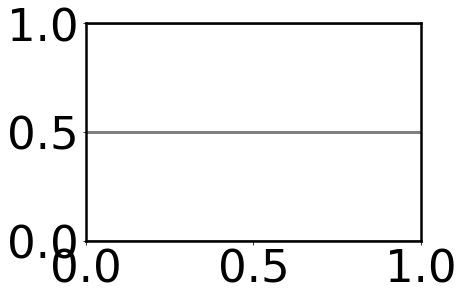

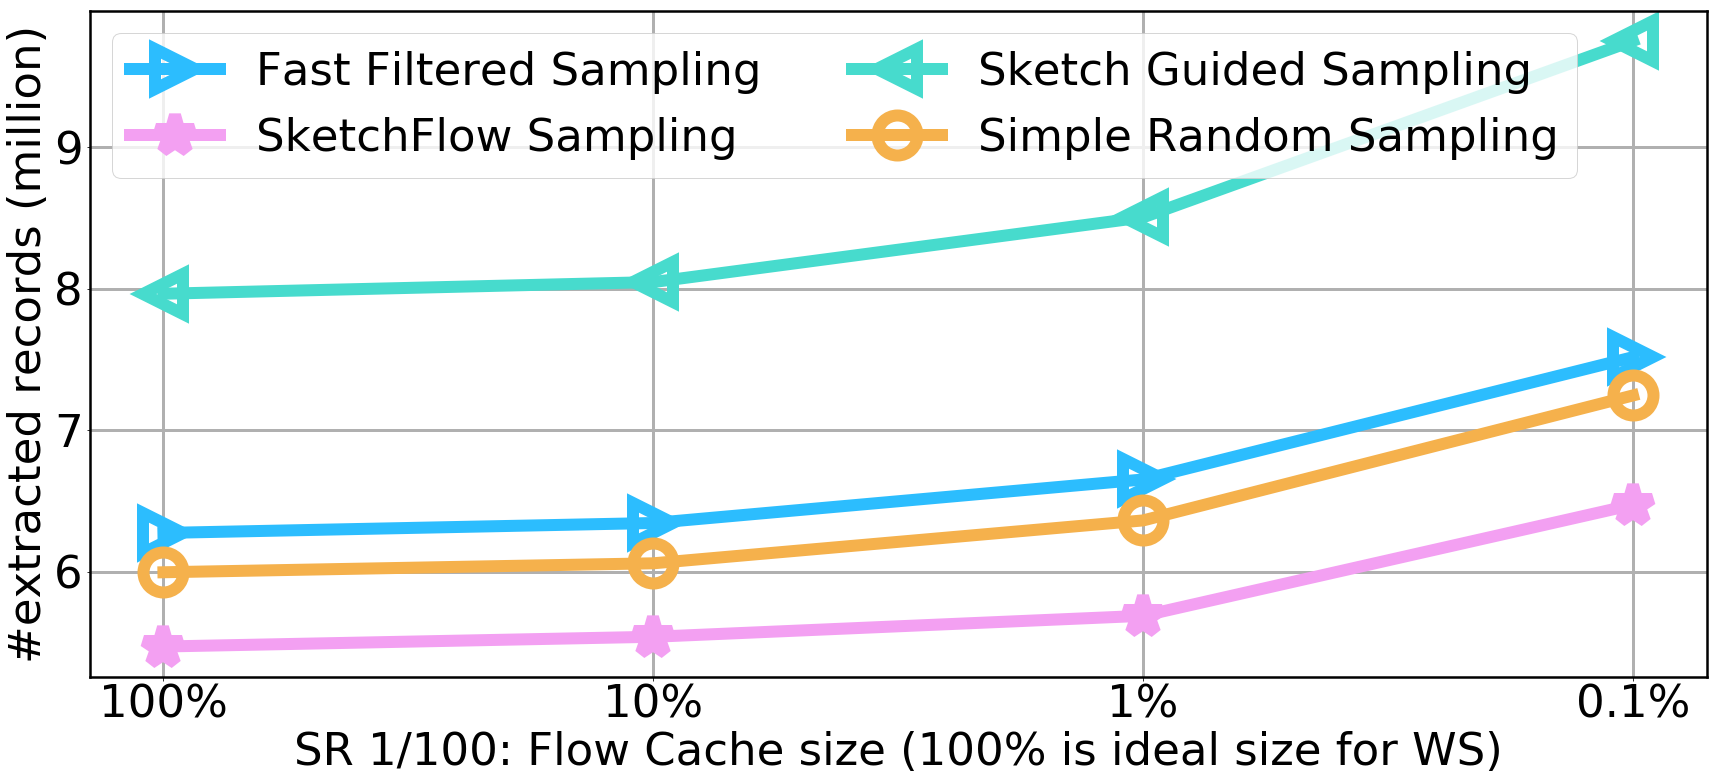

In [49]:
sr_dir = 'SI_100'
roots = ['/data/juma/data/ids18/CSVs_r_1.0_m_1.0/{}/'.format(sr_dir),
         '/data/juma/data/ids18/CSVs_r_0.1_m_1.0/{}/'.format(sr_dir),
        '/data/juma/data/ids18/CSVs_r_0.01_m_1.0/{}/'.format(sr_dir),
        '/data/juma/data/ids18/CSVs_r_0.001_m_1.0/{}/'.format(sr_dir),
        ]

records = defaultdict(list)
sampler_names = None
million=10**6

for root in roots:
    #print(root)
    sampling_dirs = get_sampling_dirs(root)
    #print(sampling_dirs)
    sampler_names = extract_sampler_names(sampling_dirs)   
    num_records = [get_num_of_records(d) for d in sampling_dirs]    
    for i,name in enumerate(sampler_names): 
        records[name].append(num_records[i]/million)

        

#drawing
N = len(roots)
ind = np.arange(N)
matplotlib_setup()
fig, ax = plt.subplots(nrows=1,ncols=1,sharex=False,figsize=(25,12))
markers = ['>','*','<','o','^']
for i,name in enumerate(sampler_names):
    print('{:30}'.format(sampler_names[i]),records[name])
    plt.plot(ind,records[name],label=sampler_names[i],linewidth=LINEWIDTH,marker=markers[i],\
            markersize=MSIZE, markeredgewidth=MEDGESIZE,markerfacecolor='none')

plt.grid(linewidth=3)
plt.ylabel(YLABEL)
plt.xlabel('SR 1/100: Flow Cache size (100% is ideal size for WS)')
plt.xticks(xtick_indices,xtick_labels)
#ax.set_ylim(25,60)
#ax.set_ylim(5,10)
fig.tight_layout()
#ax.legend(bbox_to_anchor=(1., 1.01))
plt.legend(ncol=2)
outfile = join(roots[0],OUTFILE)
plt.savefig(outfile, bbox_inches='tight',dpi=100)
plt.show()

Fast Filtered Sampling         [0.029758, 0.032618, 0.034966, 0.267466]
SketchFlow Sampling            [0.037043, 0.038858, 0.039033, 0.443263]
Sketch Guided Sampling         [0.017273, 0.017276, 0.017492, 0.017574]
Simple Random Sampling         [0.028933, 0.031525, 0.033917, 0.262394]


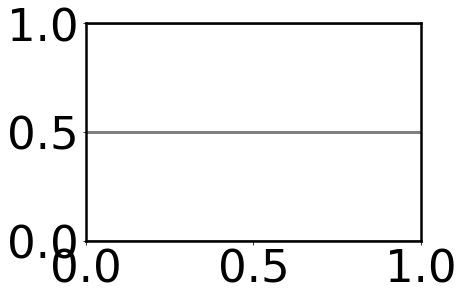

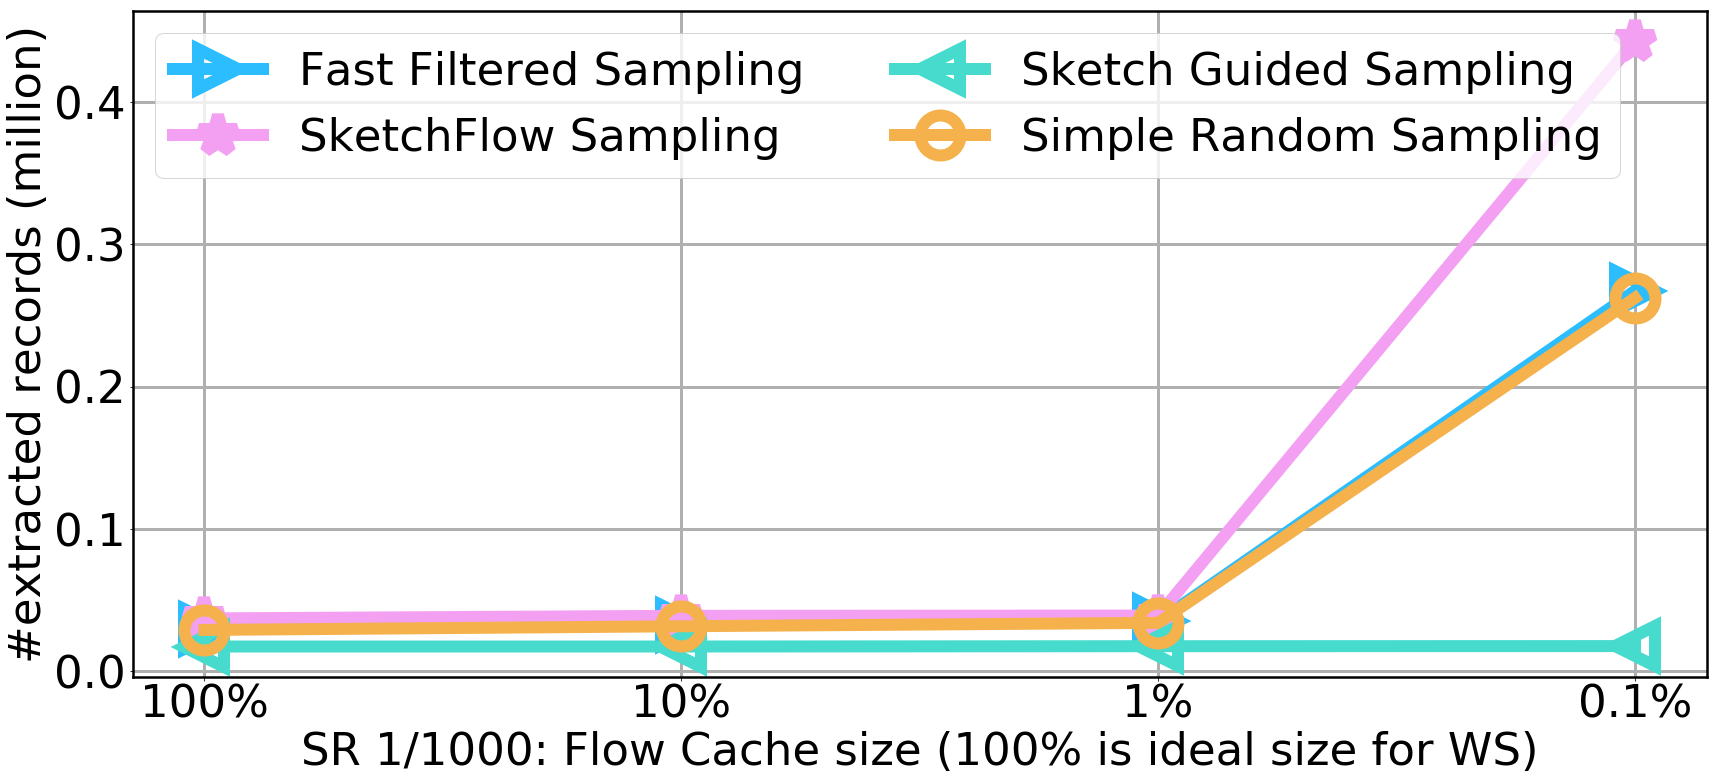

In [166]:
sr_dir = 'SI_1000'
roots = ['/data/juma/data/ids18/CSVs_r_1.0_m_1.0/{}/'.format(sr_dir),
         '/data/juma/data/ids18/CSVs_r_0.1_m_1.0/{}/'.format(sr_dir),
        '/data/juma/data/ids18/CSVs_r_0.01_m_1.0/{}/'.format(sr_dir),
        '/data/juma/data/ids18/CSVs_r_0.001_m_1.0/{}/'.format(sr_dir),
        ]


records = defaultdict(list)
sampler_names = None
million=10**6

for root in roots:
    sampling_dirs = get_sampling_dirs(root)
    sampler_names = extract_sampler_names(sampling_dirs)   
    num_records = [get_num_of_records(d) for d in sampling_dirs]    
    for i,name in enumerate(sampler_names): 
        records[name].append(num_records[i]/million)

        

#drawing
N = len(roots)
ind = np.arange(N)
matplotlib_setup()
fig, ax = plt.subplots(nrows=1,ncols=1,sharex=False,figsize=(25,12))
markers = ['>','*','<','o','^']
for i,name in enumerate(sampler_names):
    print('{:30}'.format(sampler_names[i]),records[name])
    plt.plot(ind,records[name],label=sampler_names[i],linewidth=LINEWIDTH,marker=markers[i],\
            markersize=MSIZE, markeredgewidth=MEDGESIZE,markerfacecolor='none')

plt.grid(linewidth=3)
plt.ylabel(YLABEL)
plt.xlabel('SR 1/1000: Flow Cache size (100% is ideal size for WS)')
plt.xticks(xtick_indices,xtick_labels)
#ax.set_ylim(25,60)
#ax.set_ylim(0.4,1.6)
fig.tight_layout()
#ax.legend(bbox_to_anchor=(1., 1.01))
plt.legend(ncol=2)
outfile = join(roots[0],OUTFILE)
plt.savefig(outfile, bbox_inches='tight',dpi=100)
plt.show()

In [31]:
YLABEL = '#extracted records (million)'

In [32]:
inference_YLABEL = 'Total Inference Time\n by RF (seconds)'

In [33]:
tenK = 10000
time_per_tenK = 0.10920381546020508 # in sec


In [34]:
N = 4
xtick_indices = np.arange(N)
xtick_labels = ['100%','10%','1%','0.1%']
ind = np.arange(N)
inference_OUTFILE = 'inference_time_{}.png'.format(GROUP)
    
def plot_inference_time(sampler_names, records, xlabel, ylim=[]):
    
    #drawing
    matplotlib_setup(fontsize=40)
    fig, ax = plt.subplots(nrows=1,ncols=1,sharex=False,figsize=(25,12))

    
    markers = ['>','*','<','o','^']
    for i,name in enumerate(sampler_names):
        print('{:30}'.format(sampler_names[i]),records[name])
        plt.plot(ind,np.array(records[name])/tenK*time_per_tenK,label=sampler_names[i],linewidth=LINEWIDTH,marker=markers[i],\
                markersize=MSIZE, markeredgewidth=MEDGESIZE,markerfacecolor='none')

    plt.grid(linewidth=3)
    plt.ylabel(inference_YLABEL)
    plt.xlabel(xlabel)
    plt.xticks(xtick_indices,xtick_labels)
    if len(ylim):
        ax.set_ylim(ylim)
    #ax.set_ylim(5,10)
    fig.tight_layout()
    #ax.legend(bbox_to_anchor=(1., 1.01))
    plt.legend(ncol=2)
    plt.savefig(outfile, bbox_inches='tight',dpi=100)

Without Sampling               [92151550, 131538274, 209366699, 371809973]


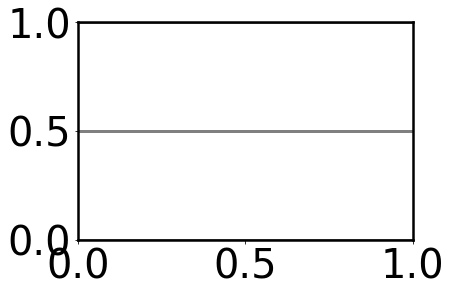

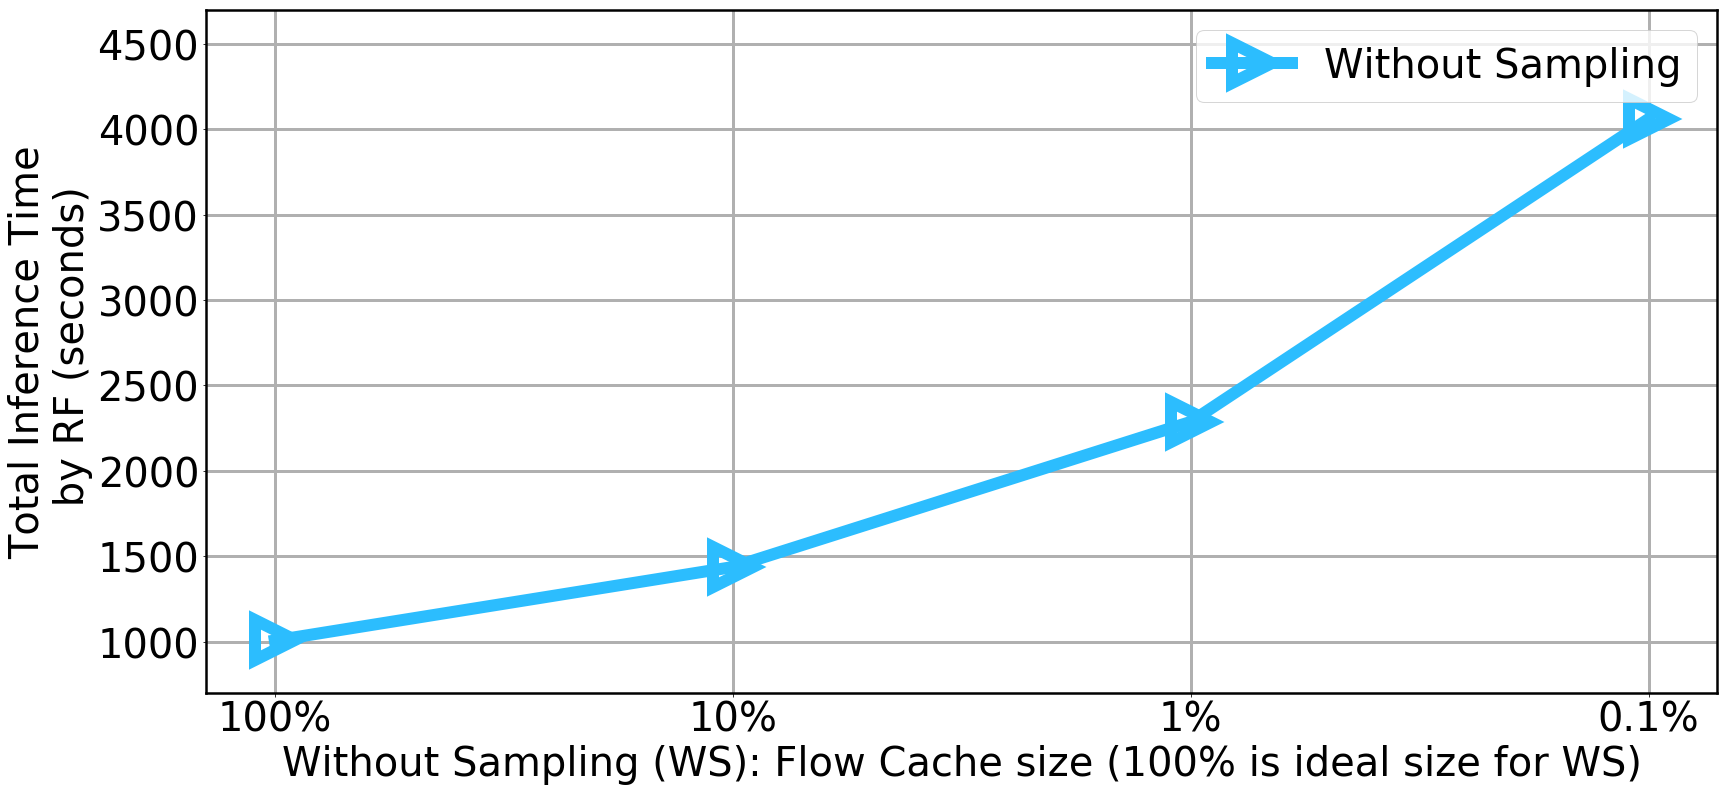

In [72]:
sampling_dirs = ['/data/juma/data/ids18/CSVs_r_1.0_m_1.0/WS_l/',
        '/data/juma/data/ids18/CSVs_r_0.1_m_1.0/WS_l/',
         '/data/juma/data/ids18/CSVs_r_0.01_m_1.0/WS_l/',
         '/data/juma/data/ids18/CSVs_r_0.001_m_1.0/WS_l/'
        ]


records = defaultdict(list)

sampler_names = extract_sampler_names(sampling_dirs)   
num_records = [get_num_of_records(d) for d in sampling_dirs]    
for i,name in enumerate(sampler_names): 
    records[name].append(num_records[i])

outfile = join(sampling_dirs[0],inference_OUTFILE)
xlabel = 'Without Sampling (WS): Flow Cache size (100% is ideal size for WS)'
plot_inference_time(sampler_names[:1], records, xlabel, ylim=[700,4700])

/data/juma/data/ids18/CSVs_r_1.0_m_1.0/SI_10/
['/data/juma/data/ids18/CSVs_r_1.0_m_1.0/SI_10/FFS_(8,16,4)_l', '/data/juma/data/ids18/CSVs_r_1.0_m_1.0/SI_10/SFS_SI_9.77_l', '/data/juma/data/ids18/CSVs_r_1.0_m_1.0/SI_10/SGS_e_0.05_l', '/data/juma/data/ids18/CSVs_r_1.0_m_1.0/SI_10/SRS_SI_10_l']
/data/juma/data/ids18/CSVs_r_0.1_m_1.0/SI_10/
['/data/juma/data/ids18/CSVs_r_0.1_m_1.0/SI_10/FFS_(8,16,4)_l', '/data/juma/data/ids18/CSVs_r_0.1_m_1.0/SI_10/SFS_SI_9.77_l', '/data/juma/data/ids18/CSVs_r_0.1_m_1.0/SI_10/SGS_e_0.05_l', '/data/juma/data/ids18/CSVs_r_0.1_m_1.0/SI_10/SRS_SI_10_l']
/data/juma/data/ids18/CSVs_r_0.01_m_1.0/SI_10/
['/data/juma/data/ids18/CSVs_r_0.01_m_1.0/SI_10/FFS_(8,16,4)_l', '/data/juma/data/ids18/CSVs_r_0.01_m_1.0/SI_10/SFS_SI_9.77_l', '/data/juma/data/ids18/CSVs_r_0.01_m_1.0/SI_10/SGS_e_0.05_l', '/data/juma/data/ids18/CSVs_r_0.01_m_1.0/SI_10/SRS_SI_10_l']
/data/juma/data/ids18/CSVs_r_0.001_m_1.0/SI_10/
['/data/juma/data/ids18/CSVs_r_0.001_m_1.0/SI_10/FFS_(8,16,4)_l', '/

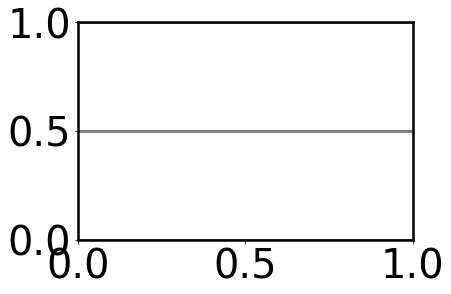

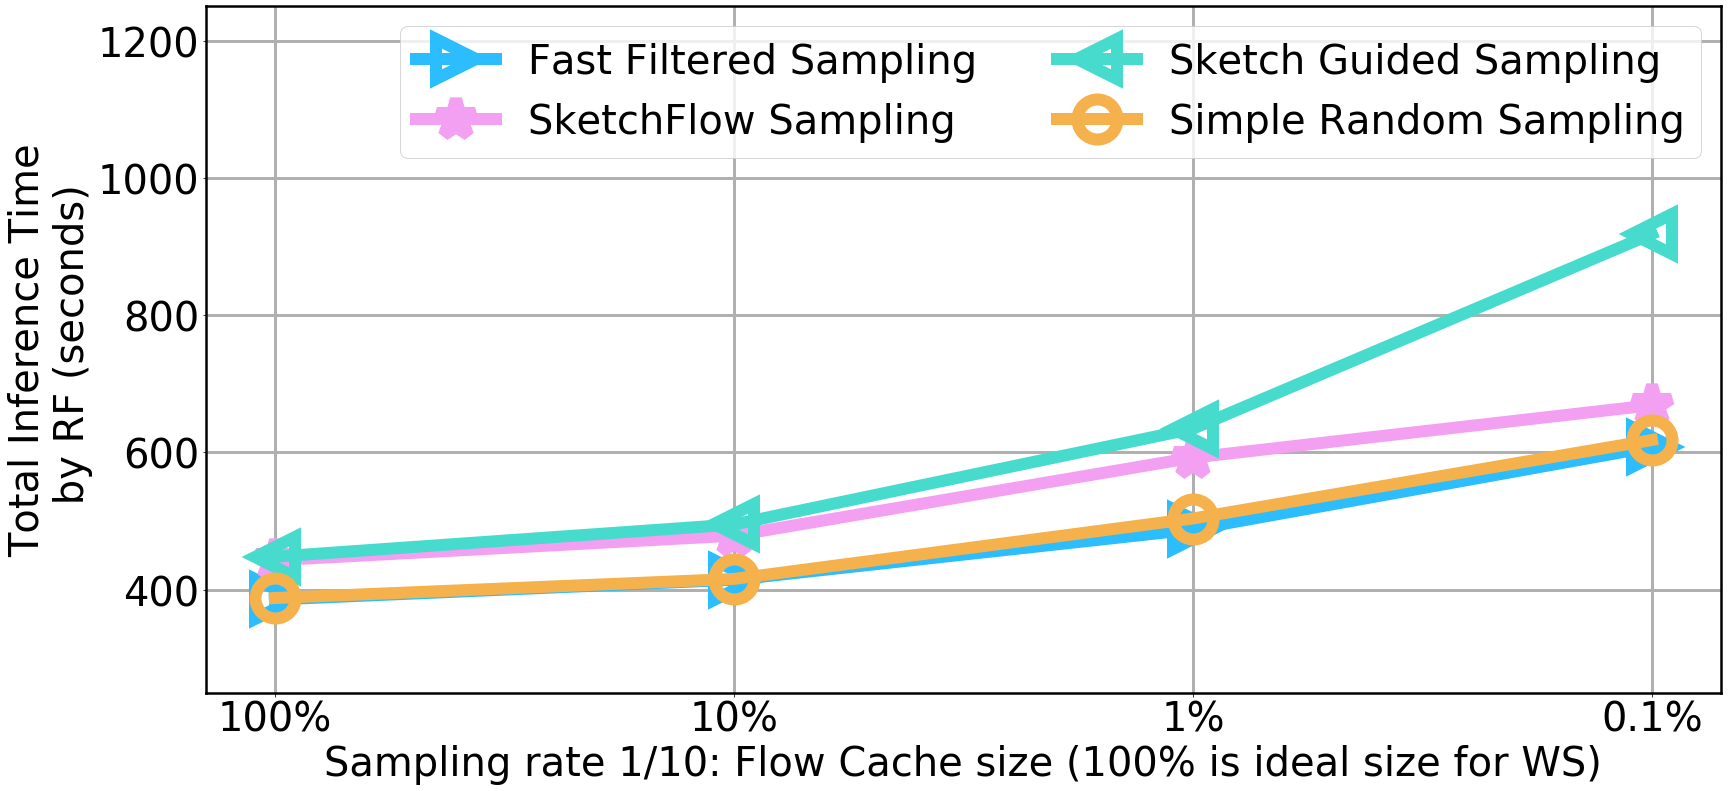

In [39]:
sr_dir = 'SI_10'
roots = ['/data/juma/data/ids18/CSVs_r_1.0_m_1.0/{}/'.format(sr_dir),
         '/data/juma/data/ids18/CSVs_r_0.1_m_1.0/{}/'.format(sr_dir),
        '/data/juma/data/ids18/CSVs_r_0.01_m_1.0/{}/'.format(sr_dir),
        '/data/juma/data/ids18/CSVs_r_0.001_m_1.0/{}/'.format(sr_dir)
        ]




records = defaultdict(list)

for root in roots:
    print(root)
    sampling_dirs = get_sampling_dirs(root)
    print(sampling_dirs)
    sampler_names = extract_sampler_names(sampling_dirs)   
    num_records = [get_num_of_records(d) for d in sampling_dirs]    
    for i,name in enumerate(sampler_names): 
        records[name].append(num_records[i])
    
outfile = join(roots[0],inference_OUTFILE)
xlabel = 'Sampling rate 1/10: Flow Cache size (100% is ideal size for WS)'
plot_inference_time(sampler_names, records, xlabel,ylim=[250,250*5])

/data/juma/data/ids18/CSVs_r_1.0_m_1.0/SI_100/
['/data/juma/data/ids18/CSVs_r_1.0_m_1.0/SI_100/FFS_(8,16,40)_l', '/data/juma/data/ids18/CSVs_r_1.0_m_1.0/SI_100/SFS_SI_95.33_l', '/data/juma/data/ids18/CSVs_r_1.0_m_1.0/SI_100/SGS_e_1_l', '/data/juma/data/ids18/CSVs_r_1.0_m_1.0/SI_100/SRS_SI_100_l']
/data/juma/data/ids18/CSVs_r_0.1_m_1.0/SI_100/
['/data/juma/data/ids18/CSVs_r_0.1_m_1.0/SI_100/FFS_(8,16,40)_l', '/data/juma/data/ids18/CSVs_r_0.1_m_1.0/SI_100/SFS_SI_95.33_l', '/data/juma/data/ids18/CSVs_r_0.1_m_1.0/SI_100/SGS_e_1_l', '/data/juma/data/ids18/CSVs_r_0.1_m_1.0/SI_100/SRS_SI_100_l']
/data/juma/data/ids18/CSVs_r_0.01_m_1.0/SI_100/
['/data/juma/data/ids18/CSVs_r_0.01_m_1.0/SI_100/FFS_(8,16,40)_l', '/data/juma/data/ids18/CSVs_r_0.01_m_1.0/SI_100/SFS_SI_95.33_l', '/data/juma/data/ids18/CSVs_r_0.01_m_1.0/SI_100/SGS_e_1_l', '/data/juma/data/ids18/CSVs_r_0.01_m_1.0/SI_100/SRS_SI_100_l']
/data/juma/data/ids18/CSVs_r_0.001_m_1.0/SI_100/
['/data/juma/data/ids18/CSVs_r_0.001_m_1.0/SI_100/FF

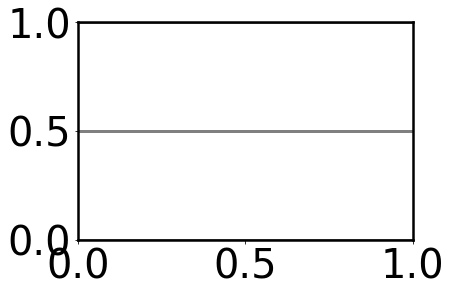

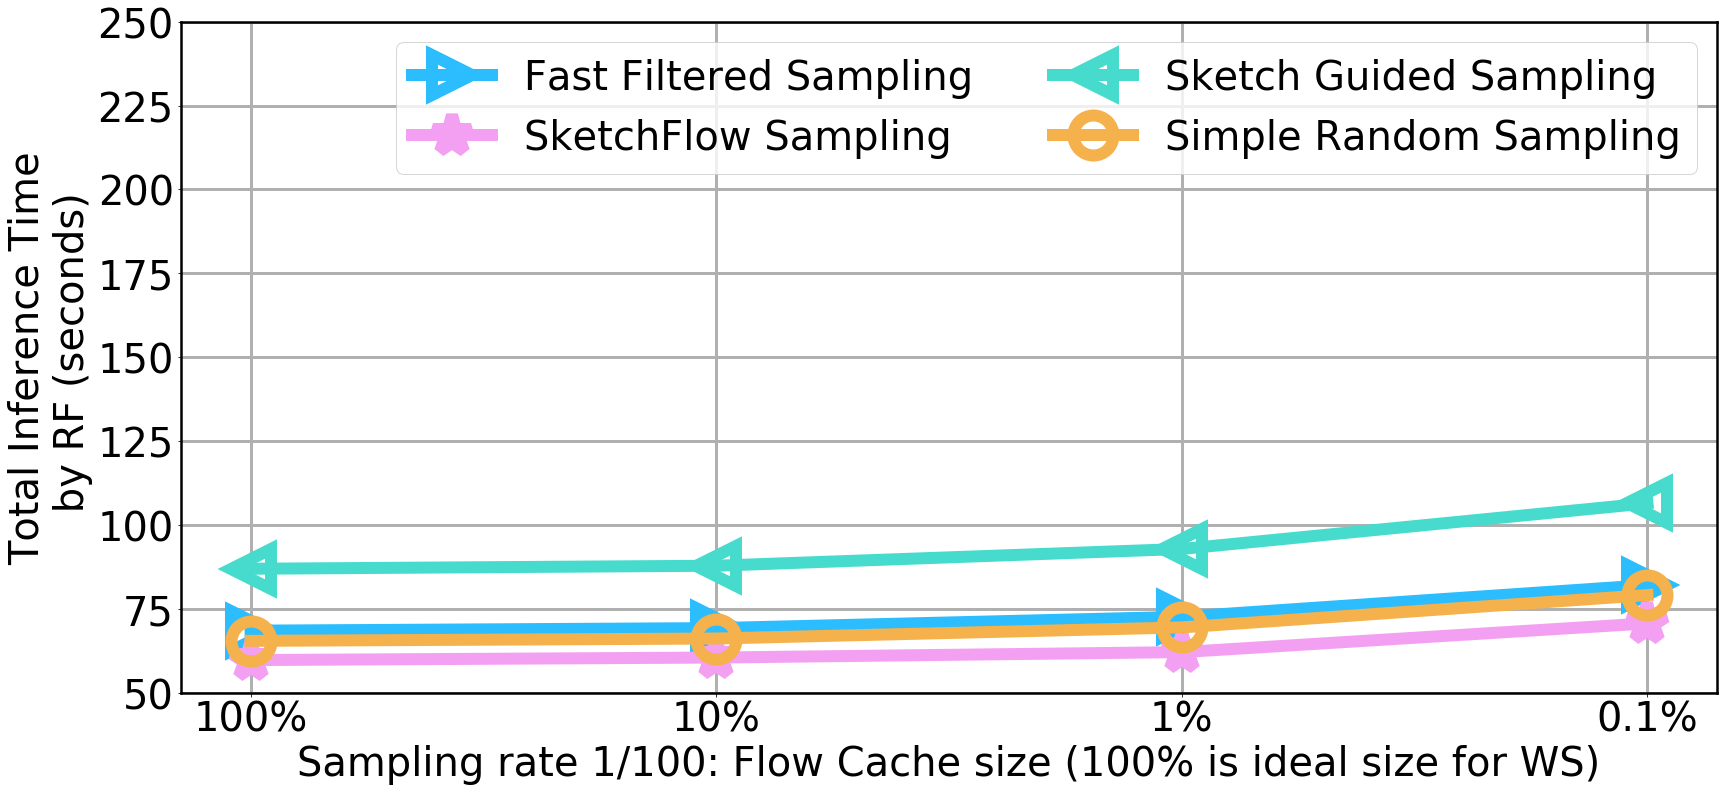

In [74]:
sr_dir = 'SI_100'
roots = ['/data/juma/data/ids18/CSVs_r_1.0_m_1.0/{}/'.format(sr_dir),
         '/data/juma/data/ids18/CSVs_r_0.1_m_1.0/{}/'.format(sr_dir),
        '/data/juma/data/ids18/CSVs_r_0.01_m_1.0/{}/'.format(sr_dir),
        '/data/juma/data/ids18/CSVs_r_0.001_m_1.0/{}/'.format(sr_dir)
        ]




records = defaultdict(list)

for root in roots:
    print(root)
    sampling_dirs = get_sampling_dirs(root)
    print(sampling_dirs)
    sampler_names = extract_sampler_names(sampling_dirs)   
    num_records = [get_num_of_records(d) for d in sampling_dirs]    
    for i,name in enumerate(sampler_names): 
        records[name].append(num_records[i])
        
outfile = join(roots[0],inference_OUTFILE)
xlabel = 'Sampling rate 1/100: Flow Cache size (100% is ideal size for WS)'
plot_inference_time(sampler_names, records, xlabel, ylim=[50, 250])

/data/juma/data/ids18/CSVs_r_1.0_m_1.0/SI_1000/
['/data/juma/data/ids18/CSVs_r_1.0_m_1.0/SI_1000/FFS_(8,16,400)_l', '/data/juma/data/ids18/CSVs_r_1.0_m_1.0/SI_1000/SFS_SI_685.08_l', '/data/juma/data/ids18/CSVs_r_1.0_m_1.0/SI_1000/SGS_e_11.5_l', '/data/juma/data/ids18/CSVs_r_1.0_m_1.0/SI_1000/SRS_SI_1000_l']
/data/juma/data/ids18/CSVs_r_0.1_m_1.0/SI_1000/
['/data/juma/data/ids18/CSVs_r_0.1_m_1.0/SI_1000/FFS_(8,16,400)_l', '/data/juma/data/ids18/CSVs_r_0.1_m_1.0/SI_1000/SFS_SI_685.08_l', '/data/juma/data/ids18/CSVs_r_0.1_m_1.0/SI_1000/SGS_e_11.5_l', '/data/juma/data/ids18/CSVs_r_0.1_m_1.0/SI_1000/SRS_SI_1000_l']
/data/juma/data/ids18/CSVs_r_0.01_m_1.0/SI_1000/
['/data/juma/data/ids18/CSVs_r_0.01_m_1.0/SI_1000/FFS_(8,16,400)_l', '/data/juma/data/ids18/CSVs_r_0.01_m_1.0/SI_1000/SFS_SI_685.08_l', '/data/juma/data/ids18/CSVs_r_0.01_m_1.0/SI_1000/SGS_e_11.5_l', '/data/juma/data/ids18/CSVs_r_0.01_m_1.0/SI_1000/SRS_SI_1000_l']
/data/juma/data/ids18/CSVs_r_0.001_m_1.0/SI_1000/
['/data/juma/data/

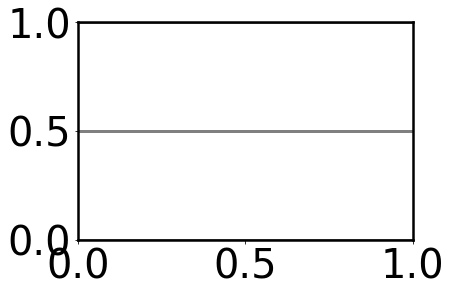

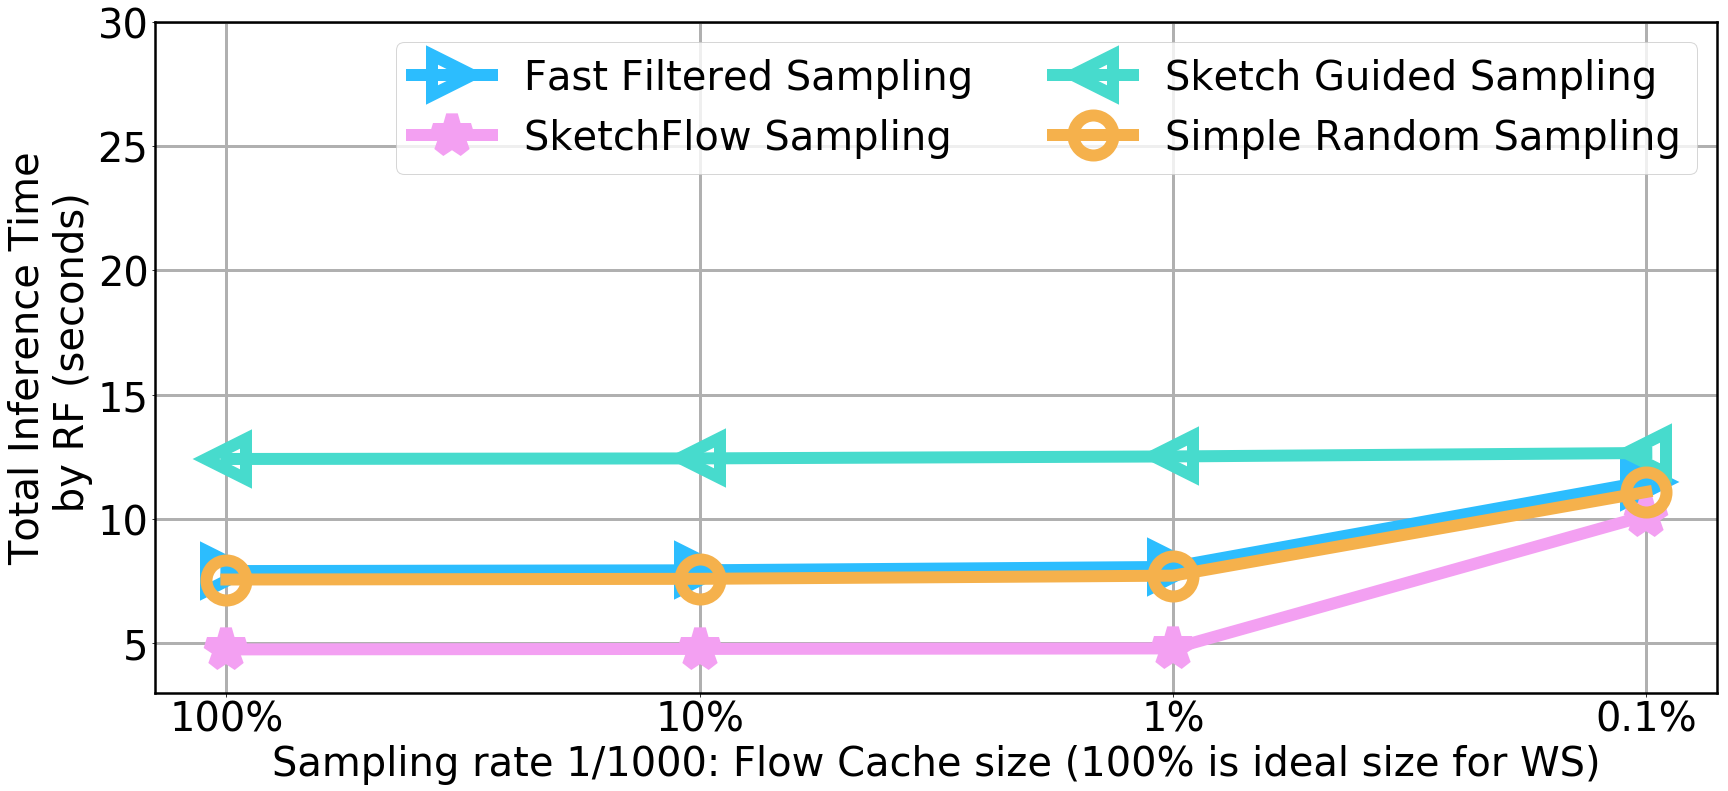

In [77]:
sr_dir = 'SI_1000'
roots = ['/data/juma/data/ids18/CSVs_r_1.0_m_1.0/{}/'.format(sr_dir),
         '/data/juma/data/ids18/CSVs_r_0.1_m_1.0/{}/'.format(sr_dir),
        '/data/juma/data/ids18/CSVs_r_0.01_m_1.0/{}/'.format(sr_dir),
        '/data/juma/data/ids18/CSVs_r_0.001_m_1.0/{}/'.format(sr_dir)
        ]




records = defaultdict(list)

for root in roots:
    print(root)
    sampling_dirs = get_sampling_dirs(root)
    print(sampling_dirs)
    sampler_names = extract_sampler_names(sampling_dirs)   
    num_records = [get_num_of_records(d) for d in sampling_dirs]    
    for i,name in enumerate(sampler_names): 
        records[name].append(num_records[i])
        
outfile = join(roots[0],inference_OUTFILE)
xlabel = 'Sampling rate 1/1000: Flow Cache size (100% is ideal size for WS)'
plot_inference_time(sampler_names, records, xlabel, ylim = [3,30])
